# Poisson Distribution - Football Matches

> This document is written in *R*.
>
> ***GitHub***: https://github.com/czs108

## Background

> There are **2** football teams. Team *A* scores a *mean* of **2** goals per match. Team *B* scores a *mean* of **3** goals per match.

## Question A

> Generate a large number of matches between **2** teams. Each match will have **2** scores - one for team *A* and one for team *B*.
>
> You can use the `rpois` function to generate random scores for each team.

In [1]:
total <- 10000
A <- rpois(n=total, lambda=2)
B <- rpois(n=total, lambda=3)

## Question B

> How many different score lines are there?
>
> How frequent is each score line? 

In [2]:
table(A, B)

   B
A     0   1   2   3   4   5   6   7   8   9  10  11  12  13
  0  65 212 304 307 204 146  78  25  12   4   2   2   0   0
  1 145 403 595 577 457 274 143  59  24  11   2   0   1   1
  2 132 385 594 611 459 288 155  55  20   8   3   0   0   0
  3  83 283 388 419 311 160  99  44  15   8   1   1   0   0
  4  35 127 216 194 149  88  49  17   9   4   3   0   0   0
  5  23  60  81  64  70  37  12   6   5   0   0   0   0   0
  6  11  23  24  31  22  10   3   3   1   1   0   0   0   0
  7   0   2  14   9   4   4   3   2   0   0   0   0   0   0
  8   1   0   2   1   0   2   1   0   0   0   0   0   0   0
  9   1   0   0   0   0   1   0   0   0   0   0   0   0   0

In [3]:
table(A, B) > 0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
1,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
2,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
4,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
5,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
7,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
9,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Finally, use the `sum` function to count the number of score lines.

In [4]:
sum(table(A, B) > 0)

[1] 92

Use the `prop.table` function to calculate the frequency.

In [5]:
prop.table(table(A, B))

   B
A        0      1      2      3      4      5      6      7      8      9
  0 0.0065 0.0212 0.0304 0.0307 0.0204 0.0146 0.0078 0.0025 0.0012 0.0004
  1 0.0145 0.0403 0.0595 0.0577 0.0457 0.0274 0.0143 0.0059 0.0024 0.0011
  2 0.0132 0.0385 0.0594 0.0611 0.0459 0.0288 0.0155 0.0055 0.0020 0.0008
  3 0.0083 0.0283 0.0388 0.0419 0.0311 0.0160 0.0099 0.0044 0.0015 0.0008
  4 0.0035 0.0127 0.0216 0.0194 0.0149 0.0088 0.0049 0.0017 0.0009 0.0004
  5 0.0023 0.0060 0.0081 0.0064 0.0070 0.0037 0.0012 0.0006 0.0005 0.0000
  6 0.0011 0.0023 0.0024 0.0031 0.0022 0.0010 0.0003 0.0003 0.0001 0.0001
  7 0.0000 0.0002 0.0014 0.0009 0.0004 0.0004 0.0003 0.0002 0.0000 0.0000
  8 0.0001 0.0000 0.0002 0.0001 0.0000 0.0002 0.0001 0.0000 0.0000 0.0000
  9 0.0001 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000
   B
A       10     11     12     13
  0 0.0002 0.0002 0.0000 0.0000
  1 0.0002 0.0000 0.0001 0.0001
  2 0.0003 0.0000 0.0000 0.0000
  3 0.0001 0.0001 0.0000 0.0000
  4 0.0003 0.000

## Question C

> How often does team *A* *beat* team *B*?

In [6]:
sum(A > B) / total

[1] 0.2452

## Question D

> Compute the distribution for the number of matches between *victories* for team *A*.
>
> Plot the frequency for each value of this number.

Use the `which` function.

In [7]:
victories <- which(A > B)

sum <- length(victories)
sum

[1] 2452

In [8]:
interval <- victories[c(2:sum)] - victories[c(1:(sum - 1))]

probs <- prop.table(table(interval))
probs

interval
           1            2            3            4            5            6 
0.2501019992 0.1831905345 0.1370869033 0.1019991840 0.0767033864 0.0673194614 
           7            8            9           10           11           12 
0.0399836801 0.0334557324 0.0252957976 0.0240718074 0.0163198694 0.0130558956 
          13           14           15           16           17           18 
0.0081599347 0.0048959608 0.0032639739 0.0044879641 0.0012239902 0.0032639739 
          19           20           21           23           26 
0.0012239902 0.0016319869 0.0016319869 0.0012239902 0.0004079967 

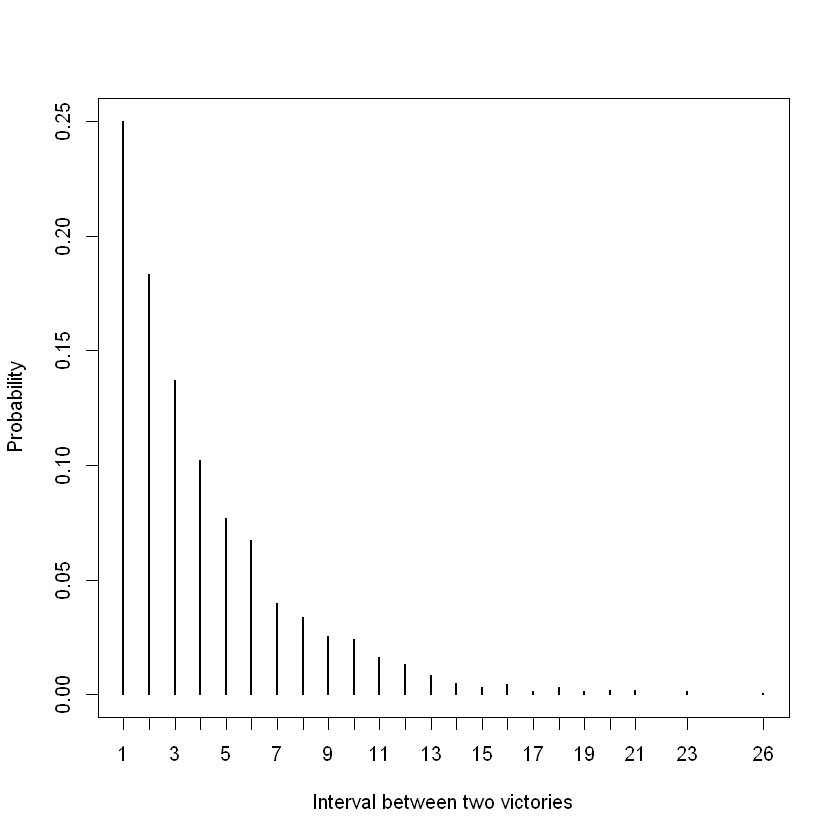

In [9]:
plot(probs, xlab="Interval between two victories", ylab="Probability")